# DIABOLO


In [1]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
#from  pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)

import pandas as pd
import numpy as np


from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from treeinterpreter import treeinterpreter as ti
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from itertools import *

import graphviz as gv

import pydotplus
import io
from scipy import misc


# PROCEDURES

In [2]:
# SELCTION DATAFRAME
def ConstruireDataFrame_one(df):
    
    df_gagnant = df    
    
    # les lignes sans GAIN sont éliminées
    df_gagnant=df_gagnant[df_gagnant.PAR_GAIN >0] # On garde les lignes avec GAIN
    
    #les lignes sans arrivée n'apporte rien
    df_gagnant=df_gagnant[df_gagnant.PAR_ARRIVE>0] # On garde la ligne qui possede information arrivée

    print(df_gagnant.shape)
    return df_gagnant


def CorrelationDesVariable(df_gagnant):
    
    fig2, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(df_gagnant.corr(), annot=True, fmt=".2f", linewidths=0.5, ax=ax)
    plt.show()
    
    #--------------------------SEPARATION DES DONNES------------------------------
def split_dataset(dataset, train_percentage, feature_headers, target_header):

    train_x, test_x, train_y, test_y = train_test_split(dataset[feature_headers],  dataset[target_header],
                                                        train_size=train_percentage)
     # Train and Test dataset size details
    print ("Train_x Shape :: ", train_x.shape)    
    print ("Train_y Shape :: ", train_y.shape)
    print ("Test_x Shape :: ", test_x.shape)    
    print ("Test_y Shape :: ", test_y.shape)
    
    
    return train_x, test_x, train_y, test_y

    #---------------CLASSIFICATION FOREST------------------------


def classificationTree(criterion, splitter,max_leaf_nodes, min_samples_split):    
    #ESTIMATEUR : arbre avec classification
    
    #### c=DecisionTreeClassifier(criterion='gini',splitter='best',max_leaf_nodes=17,min_samples_split=5000)
    
    c=DecisionTreeClassifier(criterion,splitter, max_leaf_nodes,min_samples_split)
    print(c.class_weight)
    
    
    
    
    return c

#---------------------------------------------------------------------------------
def show_arbre(arbre, my_Features, path):
    
    f=io.StringIO()

    
    export_graphviz(arbre, out_file=f, feature_names=my_Features,class_names=["0","1"],filled=1,
                    label="all",impurity=1,proportion=1,rotate=1,rounded=1 )
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img=misc.imread(path)
    plt.rcParams["figure.figsize"] = (10,10)
    plt.imshow(img)
    
    plt.show()
    
#--------------------------------------------------------------------------------------
def lecture_data(Fichier, xnames, xindex_col):
                    df=pd.read_csv (Fichier,
                                       index_col=xindex_col, 
                                       sep=';',
                                       names=xnames,skipinitialspace=True,
                                       encoding='Latin-1' )
        

                    df=df.groupby('ALLURE')     
                    df=df.get_group(1) 
                
                    #Suppression de la collone TROT
                    df.drop(["ALLURE"], axis=1, inplace=True)
                    #Suppression de la collone TROT
                    df.drop(["FIN_ligne"], axis=1, inplace=True)
                    #Suppression de la collone TROT
                    df.drop(["PAR_NP"], axis=1, inplace=True)
                    #Suppression de la collone TROT
                    df.drop(["PAR_COTEDER"], axis=1, inplace=True)
                    #Suppression de la collone TROT
                    df.drop(["cendre"], axis=1, inplace=True)
                    #Suppression de la collone TROT
                    ##df.drop(["autostart"], axis=1, inplace=True)
                    #Suppression de la collone TROT
                    df.drop(["grande_piste"], axis=1, inplace=True)
                    df.drop(["CO_DISTANCE"], axis=1, inplace=True)
                    df.drop(["musique"], axis=1, inplace=True)
                    return df 



    

#  LECTURE DES DONNES

In [3]:
xnames=['ALLURE'
                    ,'CO_DISTANCE',
                    'CO_PRIX',
                    'IDCOURSE',
                    'IDPARTCIPANT',
                    'PAR_ARRIVE',
                    'PAR_CARRIERE',
                    'PAR_CARRIERE_Q' ,
                    'PAR_CLASSE_AGE',
                    'PAR_COTEDER',
                    'PAR_ENT_ECART_GAGNANT',
                    'PAR_ENT_RAPPORT_GAGNANT_M',
                    'PAR_ENT_REU_PLACE',
                    'PAR_ENT_REUSSITE_GAGNE',
                    'PAR_ENT_VICTOIRE',
                    'PAR_GAIN',
                    'pAR_JOC_ECART_GAGNANT',
                    'PAR_JOC_ECART_PLACE',
                    'PAR_JOC_NB_COURSE',
                    'PAR_JOC_PLACE_3P',
                    'pAR_JOC_RAPPORT_GAGNANT_M',
                    'PAR_JOC_REU_PLACE',
                    'pAR_JOC_REUSSITE_GAGNE',
                    'pAR_JOC_VICTOIRE',
                    'PAR_NP',
                    'PAR_NUM',
                    'PAR_PLACE',
                    'PAR_PLACE_Q',
                    'PAR_REUSSITE_3P',
                    'PAR_REUSSITE_GAGNE',
                    'PAR_REUSSITE_QUINTE',
                    'PAR_RUESSITE_PLACE',
                    'autostart',
                    'cendre',
                    'grande_piste',
                    'Point',
                       
                    'Nb_partant',    'musique', 'FIN_ligne']

df=lecture_data('d:\diabollo_al_1.csv',xnames,['IDPARTCIPANT','IDCOURSE','PAR_NUM'])

df_numero_a_predire=lecture_data('d:\diabollo_al_1_D.csv',xnames,['IDPARTCIPANT','IDCOURSE','PAR_NUM'])

print(" df ",df.shape)
print("")
print(" df_numero_a_predire ",df_numero_a_predire.shape)



KeyError: 1

La normalisation des ensembles de données est une exigence courante pour de nombreux estimateurs d'apprentissage automatique mis en œuvre dans scikit-learn; 
ils peuvent se comporter mal 
si les caractéristiques individuelles ne ressemblent pas plus ou moins à des données standard normalement distribuées: gaussiennes avec une moyenne nulle et une variance unitaire .

# CORRELATION DES DONNEES

In [20]:
# trvail sur les courses de trot (allure=1)
# dimensions

print(df.shape) # lignes = observations
print(df.dtypes) # lignes = observations


(203766, 28)
CO_PRIX                        int64
PAR_ARRIVE                     int64
PAR_CARRIERE                   int64
PAR_CARRIERE_Q                 int64
PAR_CLASSE_AGE                 int64
PAR_ENT_ECART_GAGNANT          int64
PAR_ENT_RAPPORT_GAGNANT_M    float64
PAR_ENT_REU_PLACE            float64
PAR_ENT_REUSSITE_GAGNE       float64
PAR_ENT_VICTOIRE               int64
PAR_GAIN                     float64
pAR_JOC_ECART_GAGNANT          int64
PAR_JOC_ECART_PLACE            int64
PAR_JOC_NB_COURSE              int64
PAR_JOC_PLACE_3P               int64
pAR_JOC_RAPPORT_GAGNANT_M    float64
PAR_JOC_REU_PLACE            float64
pAR_JOC_REUSSITE_GAGNE       float64
pAR_JOC_VICTOIRE               int64
PAR_PLACE                      int64
PAR_PLACE_Q                    int64
PAR_REUSSITE_3P              float64
PAR_REUSSITE_GAGNE           float64
PAR_REUSSITE_QUINTE          float64
PAR_RUESSITE_PLACE           float64
autostart                      int64
Point                    

L’analyse univariée permet d’explorer une seule feature à la fois. 
Cette analyse se base sur les statistiques descriptives.
Ces dernières permettent de tirer des indications concises sur une feature donnée.
Parmi ces indicateurs, on retrouve la moyenne, la médiane ainsi que les mesures de dispersion de données.

Petite exploration dur la variable PAR_REUSSITE_3P

VARIANCE : 
indique de quelle manière la série de données d’une feature se disperse autour de la moyenne. Une variance élevée indique que les valeurs sont très écartées les unes des autres et vice versa.

écart type : 
L’écart type est aussi une mesure de dispersion des données. Il est tout simplement la racine carrée de la variance. On utilise souvent l’écart type que la variance pour mieux appréhender le degré de dispersion des données.

# TYPAGE du DATAFRAME AVEC ARRIVE

# DF_GAGNANT

In [21]:
#gagnant
#sélection des chevaux dans les 5 premiers


df_gagnant = df

# ne sert pas pour calcul
#df_gagnant.drop(["IDPARTCIPANT"], axis=1, inplace=True)
#df_gagnant.drop(["IDCOURSE"], axis=1, inplace=True)
#df_gagnant.drop(["PAR_NUM"], axis=1, inplace=True)



# les lignes sans GAIN sont éliminées
#df_gagnant=df_gagnant[df_gagnant.PAR_GAIN >0] # On garde les lignes avec GAIN


#df_gagnant=df_gagnant[df_gagnant.Nb_partant >5] # On garde les lignes avec GAIN
#df_gagnant=df_gagnant[df_gagnant.Nb_partant <16] # On garde les lignes avec GAIN
#df_gagnant.drop(["Nb_partant"], axis=1, inplace=True)

#les lignes sans arrivée n'apporte rien
df_gagnant=df_gagnant[df_gagnant.PAR_ARRIVE>0] # On garde la ligne qui possede information arrivée
#df_gagnant=df_gagnant[df_gagnant.CO_PRIX<50000] # On garde la ligne qui possede information arrivée
# trvail sur les courses de trot (allure=1)
print(df.shape) # description de l'ensemble
print(df_gagnant.shape) # description de l'ensemble



(203766, 28)
(187988, 28)


In [22]:



COLUM=df_gagnant.columns
COLUM



Index(['CO_PRIX', 'PAR_ARRIVE', 'PAR_CARRIERE', 'PAR_CARRIERE_Q',
       'PAR_CLASSE_AGE', 'PAR_ENT_ECART_GAGNANT', 'PAR_ENT_RAPPORT_GAGNANT_M',
       'PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE', 'PAR_ENT_VICTOIRE',
       'PAR_GAIN', 'pAR_JOC_ECART_GAGNANT', 'PAR_JOC_ECART_PLACE',
       'PAR_JOC_NB_COURSE', 'PAR_JOC_PLACE_3P', 'pAR_JOC_RAPPORT_GAGNANT_M',
       'PAR_JOC_REU_PLACE', 'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE',
       'PAR_PLACE', 'PAR_PLACE_Q', 'PAR_REUSSITE_3P', 'PAR_REUSSITE_GAGNE',
       'PAR_REUSSITE_QUINTE', 'PAR_RUESSITE_PLACE', 'autostart', 'Point',
       'Nb_partant'],
      dtype='object')

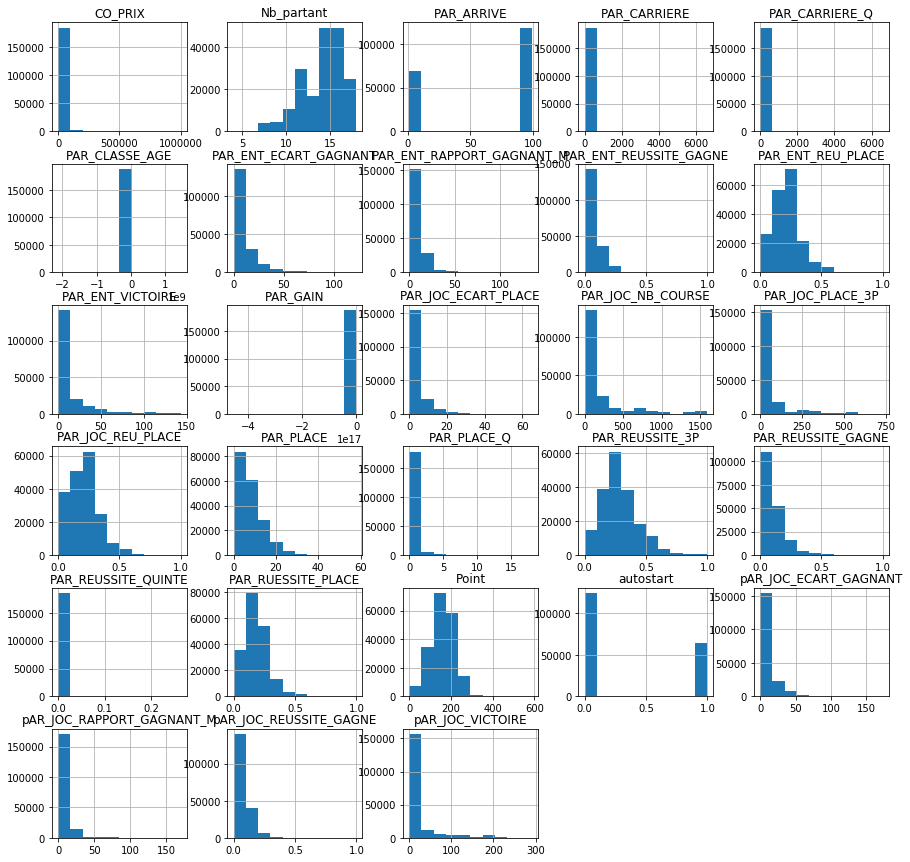

In [23]:
pd.DataFrame.hist(df_gagnant, figsize = [15,15]);

# histogramme de la variable cicle d'origine

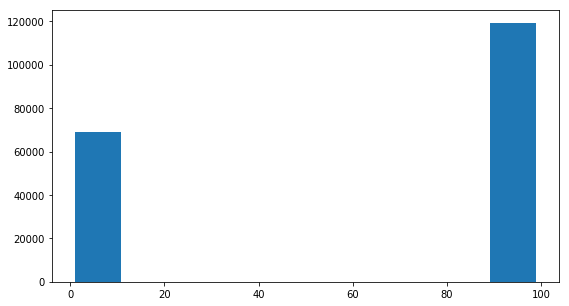

In [30]:
y1=df_gagnant['PAR_ARRIVE'].values

plt.figure( figsize=(20,5)); 
plt.subplot( 1 ,  2 ,  1  ); 
plt.hist(y1); 


# CORRELATION DES DONNEE AVEC CHEVAUX PARMI LES 3 PREMIERS

In [31]:
# Creating bins for the win column
def assign_selection(W):
    if W == 1:
        return 1
    if W >1 and W <=2:
        return 2
    if W >2 and W <=4:
        return 3
    if W >=4:
        return 0
    
    

In [32]:

#df_gagnant['SELECTION'] = (df_gagnant.PAR_ARRIVE<=3).astype(int)
df_gagnant['SELECTION'] = df_gagnant['PAR_ARRIVE'].apply(assign_selection)
#Suppression de la colonne PAR_ARRIVE
#longueur
nb=len(df_gagnant)

# pour chaque ligne du df_gagnant
#for i in xrange(df_gagnant):




#Suppression de la PAR_ARRIVE
# Elle ne sert plus
#df_gagnant.drop(["IDPARTCIPANT"], axis=1, inplace=True)
#df_gagnant.drop(["IDCOURSE"], axis=1, inplace=True)
df_gagnant.drop(["PAR_ARRIVE"], axis=1, inplace=True)
df_gagnant.drop(["Nb_partant"], axis=1, inplace=True)
df_gagnant.drop(["autostart"], axis=1, inplace=True)




print(df_gagnant.shape) # description de l'ensemble

(187988, 26)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramDat

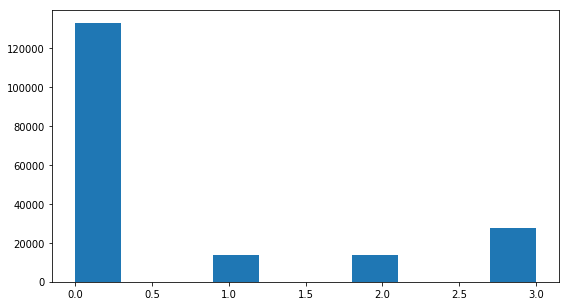

In [37]:
y2=df_gagnant['SELECTION'].values
plt.figure( figsize=(20,5)); 
plt.subplot( 1 ,  2 ,  1  ); 
plt.hist(y2); 


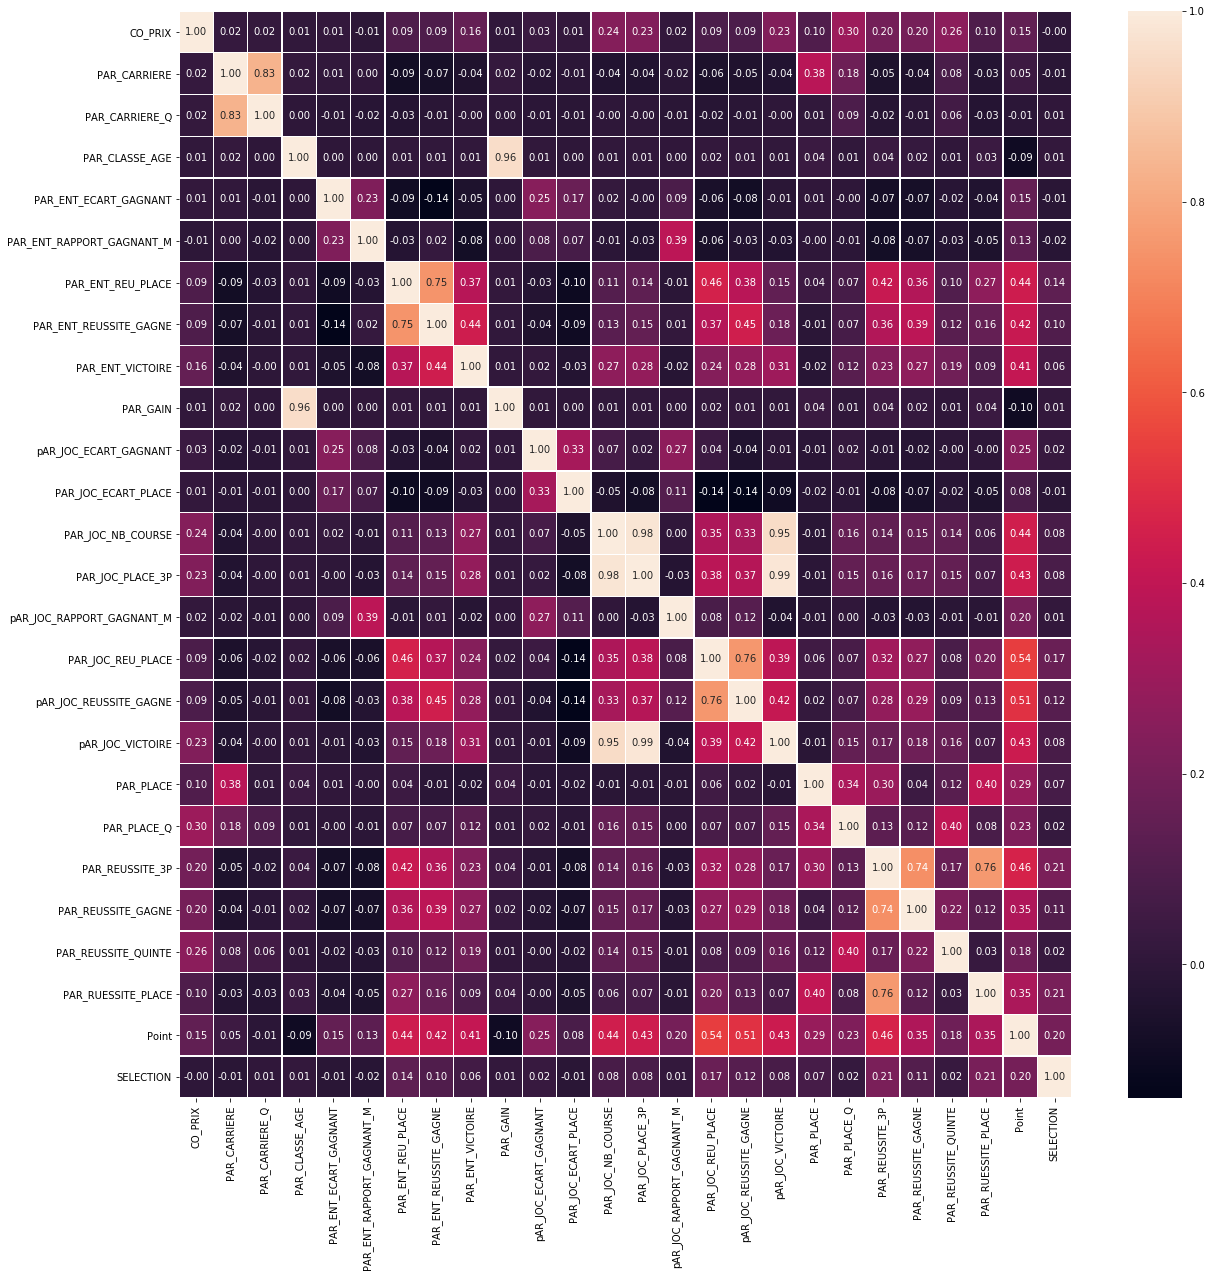

In [10]:
#Enfin, quelque chose de vraiment cool que vous pouvez mettre 

#dans une carte de chaleur est une matrice de corrélation. 
#Pandas DataFrame a une méthode corr qui calcule le coefficient de corrélation de Pearson (peut être un autre)
#entre tous les couples de colonnes numériques du DataFrame.
# On va analyser les données des DATA pour les valeurs qui ont SELECTION<=3

fig2, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_gagnant.corr(), annot=True, fmt=".2f", linewidths=0.5, ax=ax)



In [11]:
plt.show()

# Les plus forte correlations avec SELECTION sont :

 PAR_REUSSITE_3P
 Point
 PAR_JOC_REU_PLACE


PAR_REUSSITE_GAGNE
PAR_ENT_REU_PLACE
PAR_JOC_REUSSITE_GAGNE
PAR_ENT_REUSSITE_GAGNE
PAR_JOC_NB_COURSE
PAR_JOC_PLACE_3P
PAR_JOC_VICTOIRE
PAR_ENT_VICTOIRE







In [12]:

COLUM=df_gagnant.columns
print(COLUM)
print(df_gagnant.shape) # description de l'ensemble


Index(['CO_PRIX', 'PAR_CARRIERE', 'PAR_CARRIERE_Q', 'PAR_CLASSE_AGE',
       'PAR_ENT_ECART_GAGNANT', 'PAR_ENT_RAPPORT_GAGNANT_M',
       'PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE', 'PAR_ENT_VICTOIRE',
       'PAR_GAIN', 'pAR_JOC_ECART_GAGNANT', 'PAR_JOC_ECART_PLACE',
       'PAR_JOC_NB_COURSE', 'PAR_JOC_PLACE_3P', 'pAR_JOC_RAPPORT_GAGNANT_M',
       'PAR_JOC_REU_PLACE', 'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE',
       'PAR_PLACE', 'PAR_PLACE_Q', 'PAR_REUSSITE_3P', 'PAR_REUSSITE_GAGNE',
       'PAR_REUSSITE_QUINTE', 'PAR_RUESSITE_PLACE', 'Point', 'SELECTION'],
      dtype='object')
(187988, 26)


In [13]:
print(df_gagnant.shape) # description de l'ensemble
Lib_features = list(df_gagnant.columns[:25]) # Liebllé des variable DATA
print(Lib_features)
lib_cible =  "SELECTION" # libellé de la variable CIBLE
my_Features=["Point","PAR_REUSSITE_3P","PAR_JOC_REU_PLACE","PAR_REUSSITE_GAGNE","PAR_ENT_REU_PLACE",
    "pAR_JOC_REUSSITE_GAGNE","PAR_ENT_REUSSITE_GAGNE","PAR_JOC_NB_COURSE","PAR_JOC_PLACE_3P","pAR_JOC_VICTOIRE",
             "PAR_ENT_VICTOIRE"]
##my_Features=["PAR_REUSSITE_3P","Point","PAR_JOC_REU_PLACE","PAR_REUSSITE_GAGNE","PAR_ENT_REU_PLACE","PAR_ENT_VICTOIRE"]
#Lib_features=my_Features
#my_Features = Lib_features
my_Features=my_Features

(187988, 26)
['CO_PRIX', 'PAR_CARRIERE', 'PAR_CARRIERE_Q', 'PAR_CLASSE_AGE', 'PAR_ENT_ECART_GAGNANT', 'PAR_ENT_RAPPORT_GAGNANT_M', 'PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE', 'PAR_ENT_VICTOIRE', 'PAR_GAIN', 'pAR_JOC_ECART_GAGNANT', 'PAR_JOC_ECART_PLACE', 'PAR_JOC_NB_COURSE', 'PAR_JOC_PLACE_3P', 'pAR_JOC_RAPPORT_GAGNANT_M', 'PAR_JOC_REU_PLACE', 'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE', 'PAR_PLACE', 'PAR_PLACE_Q', 'PAR_REUSSITE_3P', 'PAR_REUSSITE_GAGNE', 'PAR_REUSSITE_QUINTE', 'PAR_RUESSITE_PLACE', 'Point']


#  SEPARATION DES DONNEES

# Training et Test

In [38]:
train_x, test_x, train_y, test_y = split_dataset(df_gagnant, 0.2, Lib_features, lib_cible)    

print(df_gagnant.columns) # description de l'ensemble

Train_x Shape ::  (37597, 25)
Train_y Shape ::  (37597,)
Test_x Shape ::  (150391, 25)
Test_y Shape ::  (150391,)
Index(['CO_PRIX', 'PAR_CARRIERE', 'PAR_CARRIERE_Q', 'PAR_CLASSE_AGE',
       'PAR_ENT_ECART_GAGNANT', 'PAR_ENT_RAPPORT_GAGNANT_M',
       'PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE', 'PAR_ENT_VICTOIRE',
       'PAR_GAIN', 'pAR_JOC_ECART_GAGNANT', 'PAR_JOC_ECART_PLACE',
       'PAR_JOC_NB_COURSE', 'PAR_JOC_PLACE_3P', 'pAR_JOC_RAPPORT_GAGNANT_M',
       'PAR_JOC_REU_PLACE', 'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE',
       'PAR_PLACE', 'PAR_PLACE_Q', 'PAR_REUSSITE_3P', 'PAR_REUSSITE_GAGNE',
       'PAR_REUSSITE_QUINTE', 'PAR_RUESSITE_PLACE', 'Point', 'SELECTION'],
      dtype='object')


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


 # ESTIMATEUR  :  arbre avec classification
 
 Les arbres binaires de décision (CART : classification and regression trees)
s’appliquent à tous types de variables. Les options de l’algorithme sont dé-
crites dans la documentation. La complexité du modèle est gérée par deux paramètres
: max_depth, qui détermine le nombre max de feuilles dans l’arbre,
et le nombre minimales min_samples_split d’observations requises pour
rechercher une dichotomie.


In [15]:
#### c=DecisionTreeClassifier(criterion='gini',splitter='best',max_leaf_nodes=17,min_samples_split=5000)
c=DecisionTreeClassifier(criterion='gini',splitter='best',max_leaf_nodes=4000,min_samples_split=5000)
#c=RandomForestClassifier(n_estimators=500,criterion='gini', 
 #                     max_depth=None,min_samples_split=5000, 
  #                       min_samples_leaf=1,max_features='auto', max_leaf_nodes=None,bootstrap=True, oob_score=True)


#criterion = La fonction pour mesurer la qualité d'une scission. 
#Les critères supportés sont "gini" pour l'impureté de Gini et "entropy" pour le gain d'information.


In [16]:
dt=c.fit(train_x, train_y)
#CLASSE NAMES
print( c.classes_)

[0 1 2 3]


In [17]:
def show_tree(tree, features, path):
    f=io.StringIO()
    my_classe_names = c.classes_
    
#class_names=["0","1"]
    export_graphviz(tree, out_file=f, feature_names=Lib_features,filled=1,
                    label="all",impurity=1,proportion=1,rotate=1,rounded=1 )
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img=misc.imread(path)
    plt.rcParams["figure.figsize"] = (15,15)
    plt.imshow(img)
    
    

In [18]:
show_tree(dt, my_Features,"d:\diabolo_tree.png")


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':


In [20]:
plt.show()

# PREDICTION

In [21]:
y_pred=c.predict(test_x)
print(y_pred)


[0 0 0 ..., 0 0 0]


# PROBA  = Ensemble des probabilités de X_TEST

In [22]:
PROBA=c.predict_proba(test_x)
PROBAL=c.predict_log_proba(test_x)

# DONNEES DE TEST = X_TEST

In [23]:
data_frame_proba = pd.DataFrame.from_dict(PROBA)
data_frame_proba.head()

,0,1,2,3
0,0.565462,0.097992,0.134672,0.201874
1,0.777089,0.045079,0.052523,0.125310
2,0.621074,0.092136,0.097586,0.189203
3,0.758182,0.049818,0.055273,0.136727
4,0.572376,0.051934,0.137845,0.237845


# SCORE

In [24]:

score=accuracy_score(test_y,y_pred) * 100


In [25]:
score

70.842863982126715

# CALCUL d'OPTIMISATION DES PARAMETRES

# MATRICE DE CONFUSION

In [26]:
# Optimisation du paramètre de complexité du modèle par validation croisée 

In [27]:
pd.crosstab(test_y, y_pred, rownames=['True'], colnames=['Prediction'], margins=True)

# LES ELEMENTS DIAGONAUX INDIQUE UNE BONNE CLASSIFICATION

Prediction,0,1,All
True,,,
0,52227,1112,53339
1,4484,1044,5528
2,5008,384,5392
3,10445,492,10937
All,72164,3032,75196


In [28]:
 # EN POURCENTAGE

In [29]:
pd.crosstab(test_y, y_pred, rownames=['True'], colnames=['Prediction']).apply(lambda r: 100.0 * r/r.sum())
# LES ELEMENTS DIAGONAUX INDIQUE UNE BONNE CLASSIFICATION  : avec POURCENTAGE

Prediction,0,1
True,,
0,72.372651,36.675462
1,6.213625,34.432718
2,6.939748,12.664908
3,14.473976,16.226913


In [30]:
PROBA[1]
PROBA


array([[ 0.56546185,  0.09799197,  0.13467202,  0.20187416],
       [ 0.7770885 ,  0.04507858,  0.05252275,  0.12531017],
       [ 0.62107449,  0.092136  ,  0.0975863 ,  0.18920322],
       ..., 
       [ 0.87831858,  0.02267699,  0.01935841,  0.07964602],
       [ 0.71057094,  0.05539853,  0.07461843,  0.1594121 ],
       [ 0.90434419,  0.01294904,  0.01086048,  0.07184628]])

# analyse de l'importance des features

# JOUER

In [31]:

df_numero_a_predire[lib_cible] =0
train_x, test_x, train_y, test_y = split_dataset(df_numero_a_predire, 0, Lib_features, lib_cible)   

y_pred=c.predict(test_x)


Train_x Shape ::  (0, 25)
Train_y Shape ::  (0,)
Test_x Shape ::  (131, 25)
Test_y Shape ::  (131,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [32]:

df_pred = pd.DataFrame.from_dict(y_pred)
#print(df_pred)
print(y_pred)


[0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1]


In [33]:
PROBA=c.predict_proba(test_x)


df_proba = pd.DataFrame.from_dict(PROBA)



In [34]:
# ajouter a test_x les collone 0 et 1 (probabilité)


df_final =pd.concat([df_proba,df_pred], axis=1)


print(df_final)



            0         1         2         3  0
0    0.777089  0.045079  0.052523  0.125310  0
1    0.670796  0.074324  0.087462  0.167417  0
2    0.792175  0.039678  0.051609  0.116537  0
3    0.904344  0.012949  0.010860  0.071846  0
4    0.348362  0.349681  0.144931  0.157027  1
5    0.436524  0.167566  0.163306  0.232604  0
6    0.436524  0.167566  0.163306  0.232604  0
7    0.849381  0.017185  0.033106  0.100329  0
8    0.758182  0.049818  0.055273  0.136727  0
9    0.348362  0.349681  0.144931  0.157027  1
10   0.565462  0.097992  0.134672  0.201874  0
11   0.758182  0.049818  0.055273  0.136727  0
12   0.808875  0.035383  0.036253  0.119490  0
13   0.758182  0.049818  0.055273  0.136727  0
14   0.565462  0.097992  0.134672  0.201874  0
15   0.565462  0.097992  0.134672  0.201874  0
16   0.808361  0.019064  0.054849  0.117726  0
17   0.458168  0.192426  0.145751  0.203655  0
18   0.436524  0.167566  0.163306  0.232604  0
19   0.565462  0.097992  0.134672  0.201874  0
20   0.670796

In [35]:

##test_x.reset_index(drop = True, inplace = True) 


test_x.drop(["PAR_CLASSE_AGE"], axis=1, inplace=True)
test_x.drop(["PAR_ENT_ECART_GAGNANT"], axis=1, inplace=True)
test_x.drop(["PAR_ENT_RAPPORT_GAGNANT_M"], axis=1, inplace=True)
test_x.drop(["PAR_ENT_REU_PLACE"], axis=1, inplace=True)
test_x.drop(["PAR_ENT_REUSSITE_GAGNE"], axis=1, inplace=True)
test_x.drop(["PAR_ENT_VICTOIRE"], axis=1, inplace=True)
test_x.drop(["PAR_GAIN"], axis=1, inplace=True)
test_x.drop(["pAR_JOC_ECART_GAGNANT"], axis=1, inplace=True)
test_x.drop(["PAR_JOC_ECART_PLACE"], axis=1, inplace=True)
test_x.drop(["PAR_JOC_NB_COURSE"], axis=1, inplace=True)
test_x.drop(["PAR_JOC_PLACE_3P"], axis=1, inplace=True)
test_x.drop(["PAR_REUSSITE_GAGNE"], axis=1, inplace=True)
test_x.drop(["PAR_REUSSITE_QUINTE"], axis=1, inplace=True)
test_x.drop(["PAR_RUESSITE_PLACE"], axis=1, inplace=True)
test_x.drop(["CO_PRIX"], axis=1, inplace=True)
test_x.drop(["PAR_CARRIERE"], axis=1, inplace=True)
test_x.drop(["PAR_CARRIERE_Q"], axis=1, inplace=True)
test_x.drop(["pAR_JOC_RAPPORT_GAGNANT_M"], axis=1, inplace=True)
test_x.drop(["PAR_JOC_REU_PLACE"], axis=1, inplace=True)
test_x.drop(["pAR_JOC_REUSSITE_GAGNE"], axis=1, inplace=True)
test_x.drop(["pAR_JOC_VICTOIRE"], axis=1, inplace=True)
test_x.drop(["PAR_PLACE"], axis=1, inplace=True)
test_x.drop(["PAR_PLACE_Q"], axis=1, inplace=True)
test_x.drop(["PAR_REUSSITE_3P"], axis=1, inplace=True)
#test_x.drop(["autostart"], axis=1, inplace=True)
#test_x.drop(["Point"], axis=1, inplace=True)
#test_x.drop(["Nb_partant"], axis=1, inplace=True)





In [36]:
print(test_x)



                               Point
IDPARTCIPANT IDCOURSE PAR_NUM       
560946       45365    14         195
560850       45358    13         190
560961       45367    6          106
560842       45358    5          100
560932       45364    11         285
560868       45360    3          150
560990       45370    4          197
560892       45361    12         147
560916       45363    8          179
560882       45361    2          226
560915       45363    7          204
560875       45360    10         183
560838       45358    1          140
560874       45360    9          158
560912       45363    4          238
560918       45363    10         251
560938       45365    6          125
560987       45370    1          270
560877       45360    12         159
560928       45364    7          221
560847       45358    10         186
560917       45363    9          174
560974       45368    8          197
560970       45368    4          122
560941       45365    9          146
5

In [37]:
test_x['v0']=0.0
test_x['v1']=0.0
test_x['sel']=0
test_x



,,,Point,v0,v1,sel
IDPARTCIPANT,IDCOURSE,PAR_NUM,,,,
560946,45365,14,195,0.0,0.0,0
560850,45358,13,190,0.0,0.0,0
560961,45367,6,106,0.0,0.0,0
560842,45358,5,100,0.0,0.0,0
560932,45364,11,285,0.0,0.0,0
560868,45360,3,150,0.0,0.0,0
560990,45370,4,197,0.0,0.0,0
560892,45361,12,147,0.0,0.0,0
560916,45363,8,179,0.0,0.0,0


In [38]:
cumul=1

nb_rows=len(df_proba.index)

for i in range(0,nb_rows):
    n=df_proba[0][i]
    test_x['v0'][i]=n    
    n=df_proba[1][i]
    test_x['v1'][i]=n      
    #i +=1
    


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [39]:
n

0.34968110842313616

In [40]:
test_x.sort_values(["v1"])

,,,Point,v0,v1,sel
IDPARTCIPANT,IDCOURSE,PAR_NUM,,,,
560957,45367,2,31,0.950215,0.008605,0
560952,45366,5,68,0.950215,0.008605,0
560969,45368,3,30,0.878802,0.010611,0
560964,45367,9,60,0.878802,0.010611,0
560966,45367,11,54,0.878802,0.010611,0
560962,45367,7,45,0.878802,0.010611,0
560948,45366,1,49,0.907522,0.012422,0
560933,45365,1,118,0.907522,0.012422,0
560842,45358,5,100,0.904344,0.012949,0


In [41]:
test_x.to_csv('d:\py_resultat.csv')

